# INFORME ESTADÍSTICO: DATASET CURSOS UDEMY
Gonzalo López Blanquer y Eduardo Abad Zabala


Como primer paso, hemos importado todas las librerías que usaremos para el documento

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fitter import Fitter

# Cargamos nuestro dataset
df=pd.read_csv('udemy_courses_dataset.csv')



Vemos las columnas del dataset

In [33]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

Consideramos que la url y la fecha de publicación, no nos da información relevante, por lo que la eliminamos

In [34]:
data= df.drop(columns=['url', 'published_timestamp'], axis=1)
data


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,Web Development
3675,635248,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,Web Development


## 1. Elección de datos y breve descripción de su naturaleza

In [35]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   course_title      3678 non-null   object 
 2   is_paid           3678 non-null   bool   
 3   price             3678 non-null   int64  
 4   num_subscribers   3678 non-null   int64  
 5   num_reviews       3678 non-null   int64  
 6   num_lectures      3678 non-null   int64  
 7   level             3678 non-null   object 
 8   content_duration  3678 non-null   float64
 9   subject           3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 262.3+ KB


### Naturaleza de los datos

- Variables categóricas --> is_paid, level, subject
- Variables cuantitativas:
  - Variables discretas --> price, num_suscribers, num_reviews, num_lectures 
  - Variables continuas --> content_duration


In [40]:
data['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

No coinciden media y mediana

<Axes: title={'center': 'Histograma con pandas'}, ylabel='Frequency'>

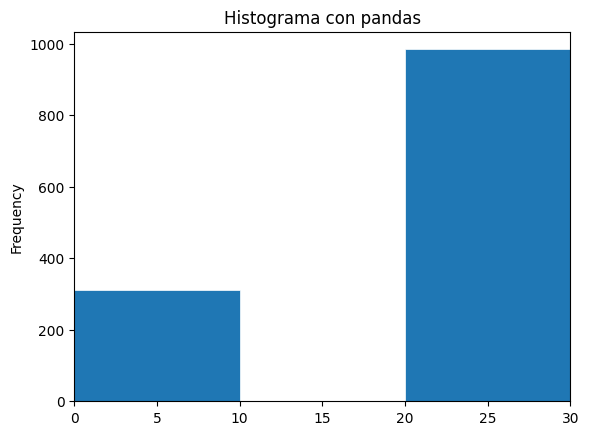

In [39]:
# Visualizamos PRICE en histograma
data["price"].plot(kind='hist',bins=20, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 30))

No sigue una distribución normal

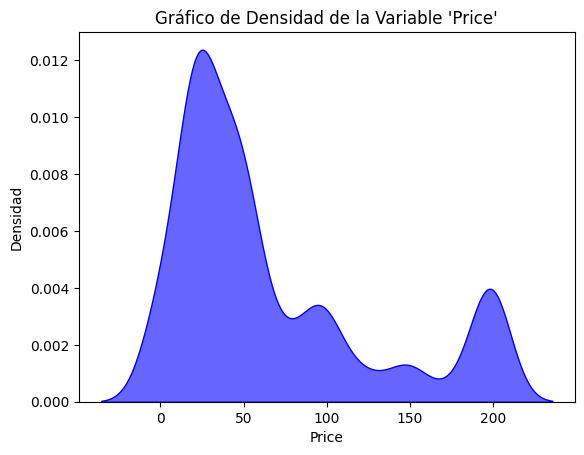

In [41]:
# Gráfico de densidad para la variable 'price'
sns.kdeplot(data=data, x='price', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()

<Axes: >

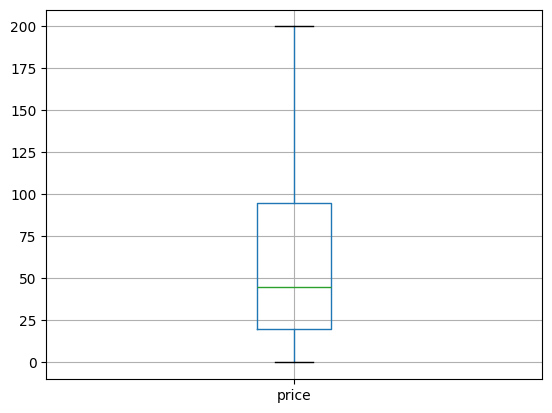

In [42]:
# Visualizamos PRICE en boxplot
data.boxplot(column="price")

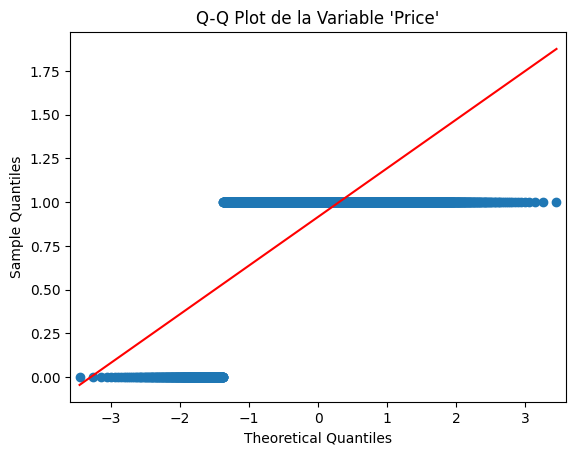

In [45]:
# Q-Q plot para la variable 'price'
sm.qqplot(data['is_paid'], line='s')
plt.title("Q-Q Plot de la Variable 'Price'")
plt.show()


En PRICE : no sigue una D. Normal ( media y mediana no coinciden, histograma,boxplot y  densityplot no són simétricas)
Hemos visto que hay muchos más valores a la derecha que a la izq= hay más precios altos que bajos.
Podría seguir una D. Poisson ( por los valores atípicos)

en NUM_SUBSCRIBERS :  no sigue una Normal, media y mediana muy diferentes, y el histograma y boxplot no muestran una forma d enormal. 
Podría seguir una D.Poisson ( por muchos outliers)

en NUM_REVIEWS : LO MISMO

NUM_LECTURES :  LO MISMO


2024-11-19 18:52:00.845 | WARNING  | fitter.fitter:plot_pdf:419 - betta was not fitted. no parameters available
2024-11-19 18:52:00.847 | WARNING  | fitter.fitter:plot_pdf:419 - exp was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.021396,1130.513440,1142.933689,inf,0.241073,1.272299e-188
gamma,0.023157,1272.842744,1291.473118,inf,0.468402,0.000000e+00
betta,inf,inf,inf,inf,NaN,NaN
exp,inf,inf,inf,inf,NaN,NaN


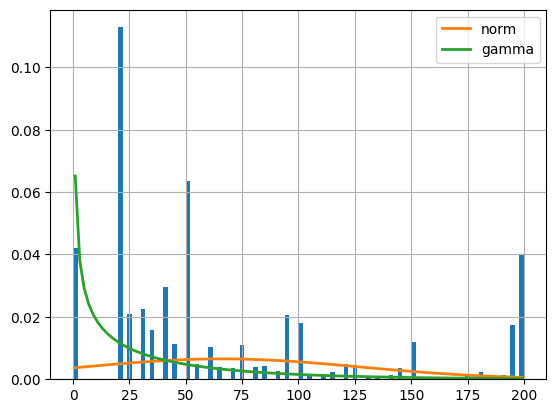

In [44]:
f = Fitter(data['price'],distributions=['norm', 'exp', 'gamma', 'betta'])
f.fit()
f.summary()

In [14]:
data.groupby('subject')['subject'].count()

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: subject, dtype: int64

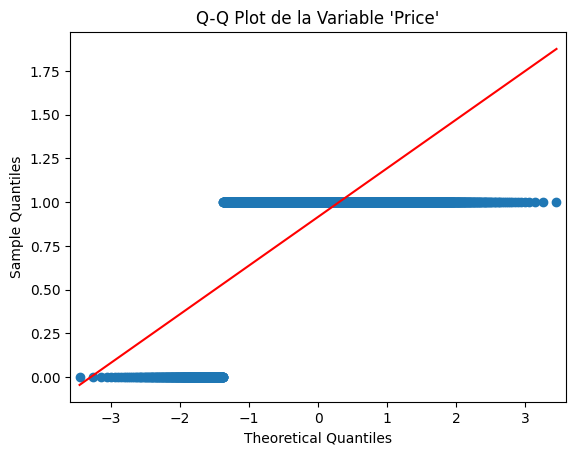

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24420\3174130952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='is_paid', palette='viridis')


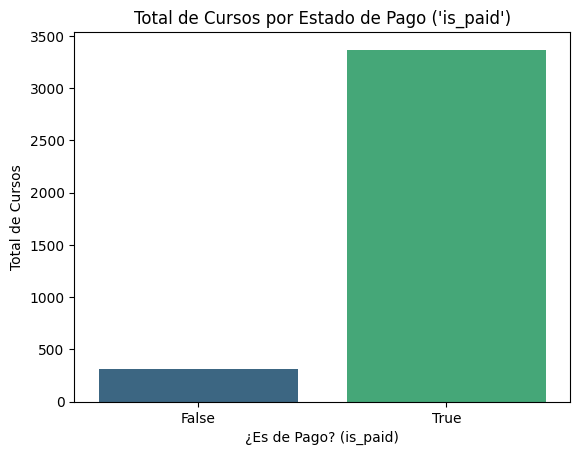

In [ ]:



# Gráfico de barras: total de cursos por 'is_paid'
sns.countplot(data=data, x='is_paid', palette='viridis')
plt.title("Total de Cursos por Estado de Pago ('is_paid')")
plt.xlabel("¿Es de Pago? (is_paid)")
plt.ylabel("Total de Cursos")
plt.show()


In [14]:
# Describimos variables cuantitativas
data['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

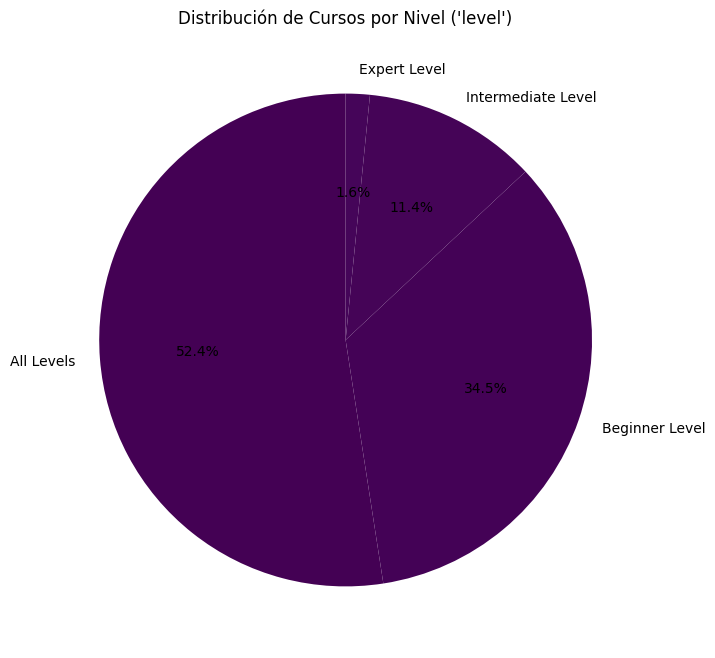

In [47]:
# PIE CHART

level_counts = data['level'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis.colors)
plt.title("Distribución de Cursos por Nivel ('level')")
plt.show()

In [9]:
data['num_reviews'].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

<Axes: xlabel='price', ylabel='num_subscribers'>

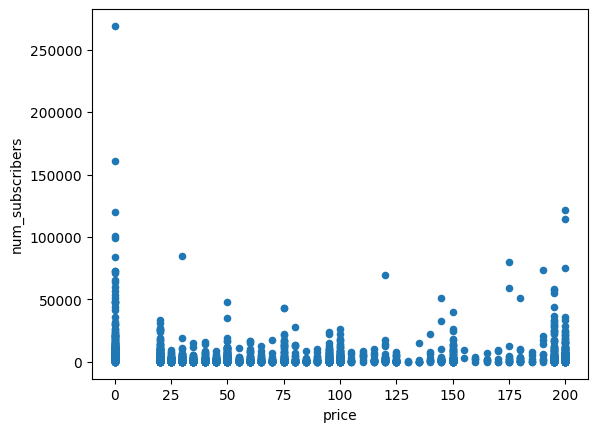

In [22]:
# Visualizamos dos variables en ScatterPlot
data.plot(x='price', y='num_subscribers', kind='scatter')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21848\1656741197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')


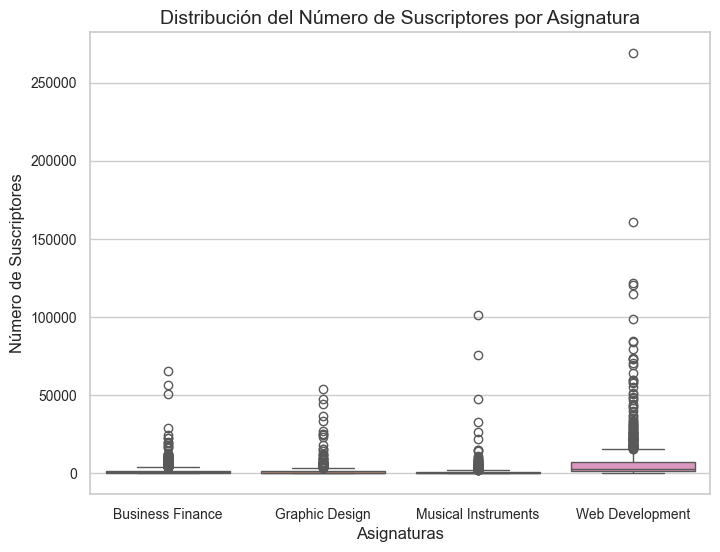

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución del Número de Suscriptores por Asignatura', fontsize=14)
plt.xlabel('Asignaturas', fontsize=12)
plt.ylabel('Número de Suscriptores', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()


In [23]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [ ]:
# ANOVA

#  Hemos hecho un test de ANOVA  anaizando dos variables (num_subscribers y subject), 
# de manera que vamos a estudiar si són similares o diferentes las distintas subjects relacionada

# Tiene PvALOR MUY BAJO

In [17]:
from scipy.stats import kruskal
import pandas as pd

# Asegúrate de que tu dataset ya está cargado en tu variable (por ejemplo, `tu_dataset`)

# Crear listas separadas para cada grupo de subjects
groups = [group['num_subscribers'].values for name, group in data.groupby('subject')]

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Mostrar resultados
print("Estadístico de Kruskal-Wallis:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos (rechazamos H0).")
else:
    print("No hay diferencias significativas entre los grupos (no se rechaza H0).")


Estadístico de Kruskal-Wallis: 1001.6004591500682
Valor p: 8.08991636213762e-217
Hay diferencias significativas entre los grupos (rechazamos H0).


In [ ]:
# Como podemos observar en el Kruskal-Wallis , el pvalor es MUY BAJO, por tanto  RECHAZAMOS  Ho
# Por tanto, concluimos con que las SUBJECT no tienen una media similar de NUM_SUBSCRIBERS 
# Al no seguir una distribución normal la variable (num_subscribers), hemos hecho la prueba KRUSKAL-WALLIS 
# Hemos visto las medias de num_subscribers en cada subject,  WEB DEVELOPMENT tiene una emdia bastante más alta
# Por tanto todas las subjects tienen una media relativamente similar, excepto WEB DEVELOPMENT que es bastante más grande

